In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
df.corr()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333


<AxesSubplot:>

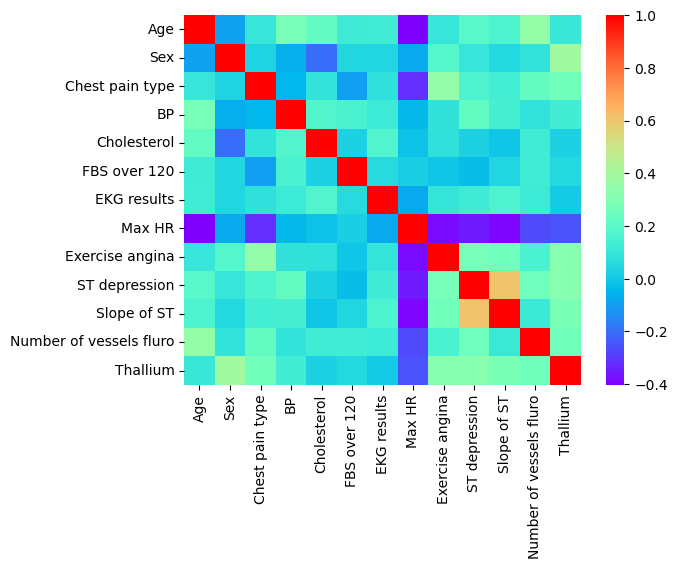

In [4]:
sns.heatmap(df.corr(),cmap='rainbow')

In [5]:
df.drop('Slope of ST',axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Number of vessels fluro  270 non-null    int64  
 11  Thallium                 270 non-null    int64  
 12  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(11), object(1)
memory usage: 27.5+ KB


In [7]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,7.000000


In [8]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Heart Disease'] =label_encoder.fit_transform(df['Heart Disease'])

df['Heart Disease'].head()

0    1
1    0
2    1
3    0
4    0
Name: Heart Disease, dtype: int32

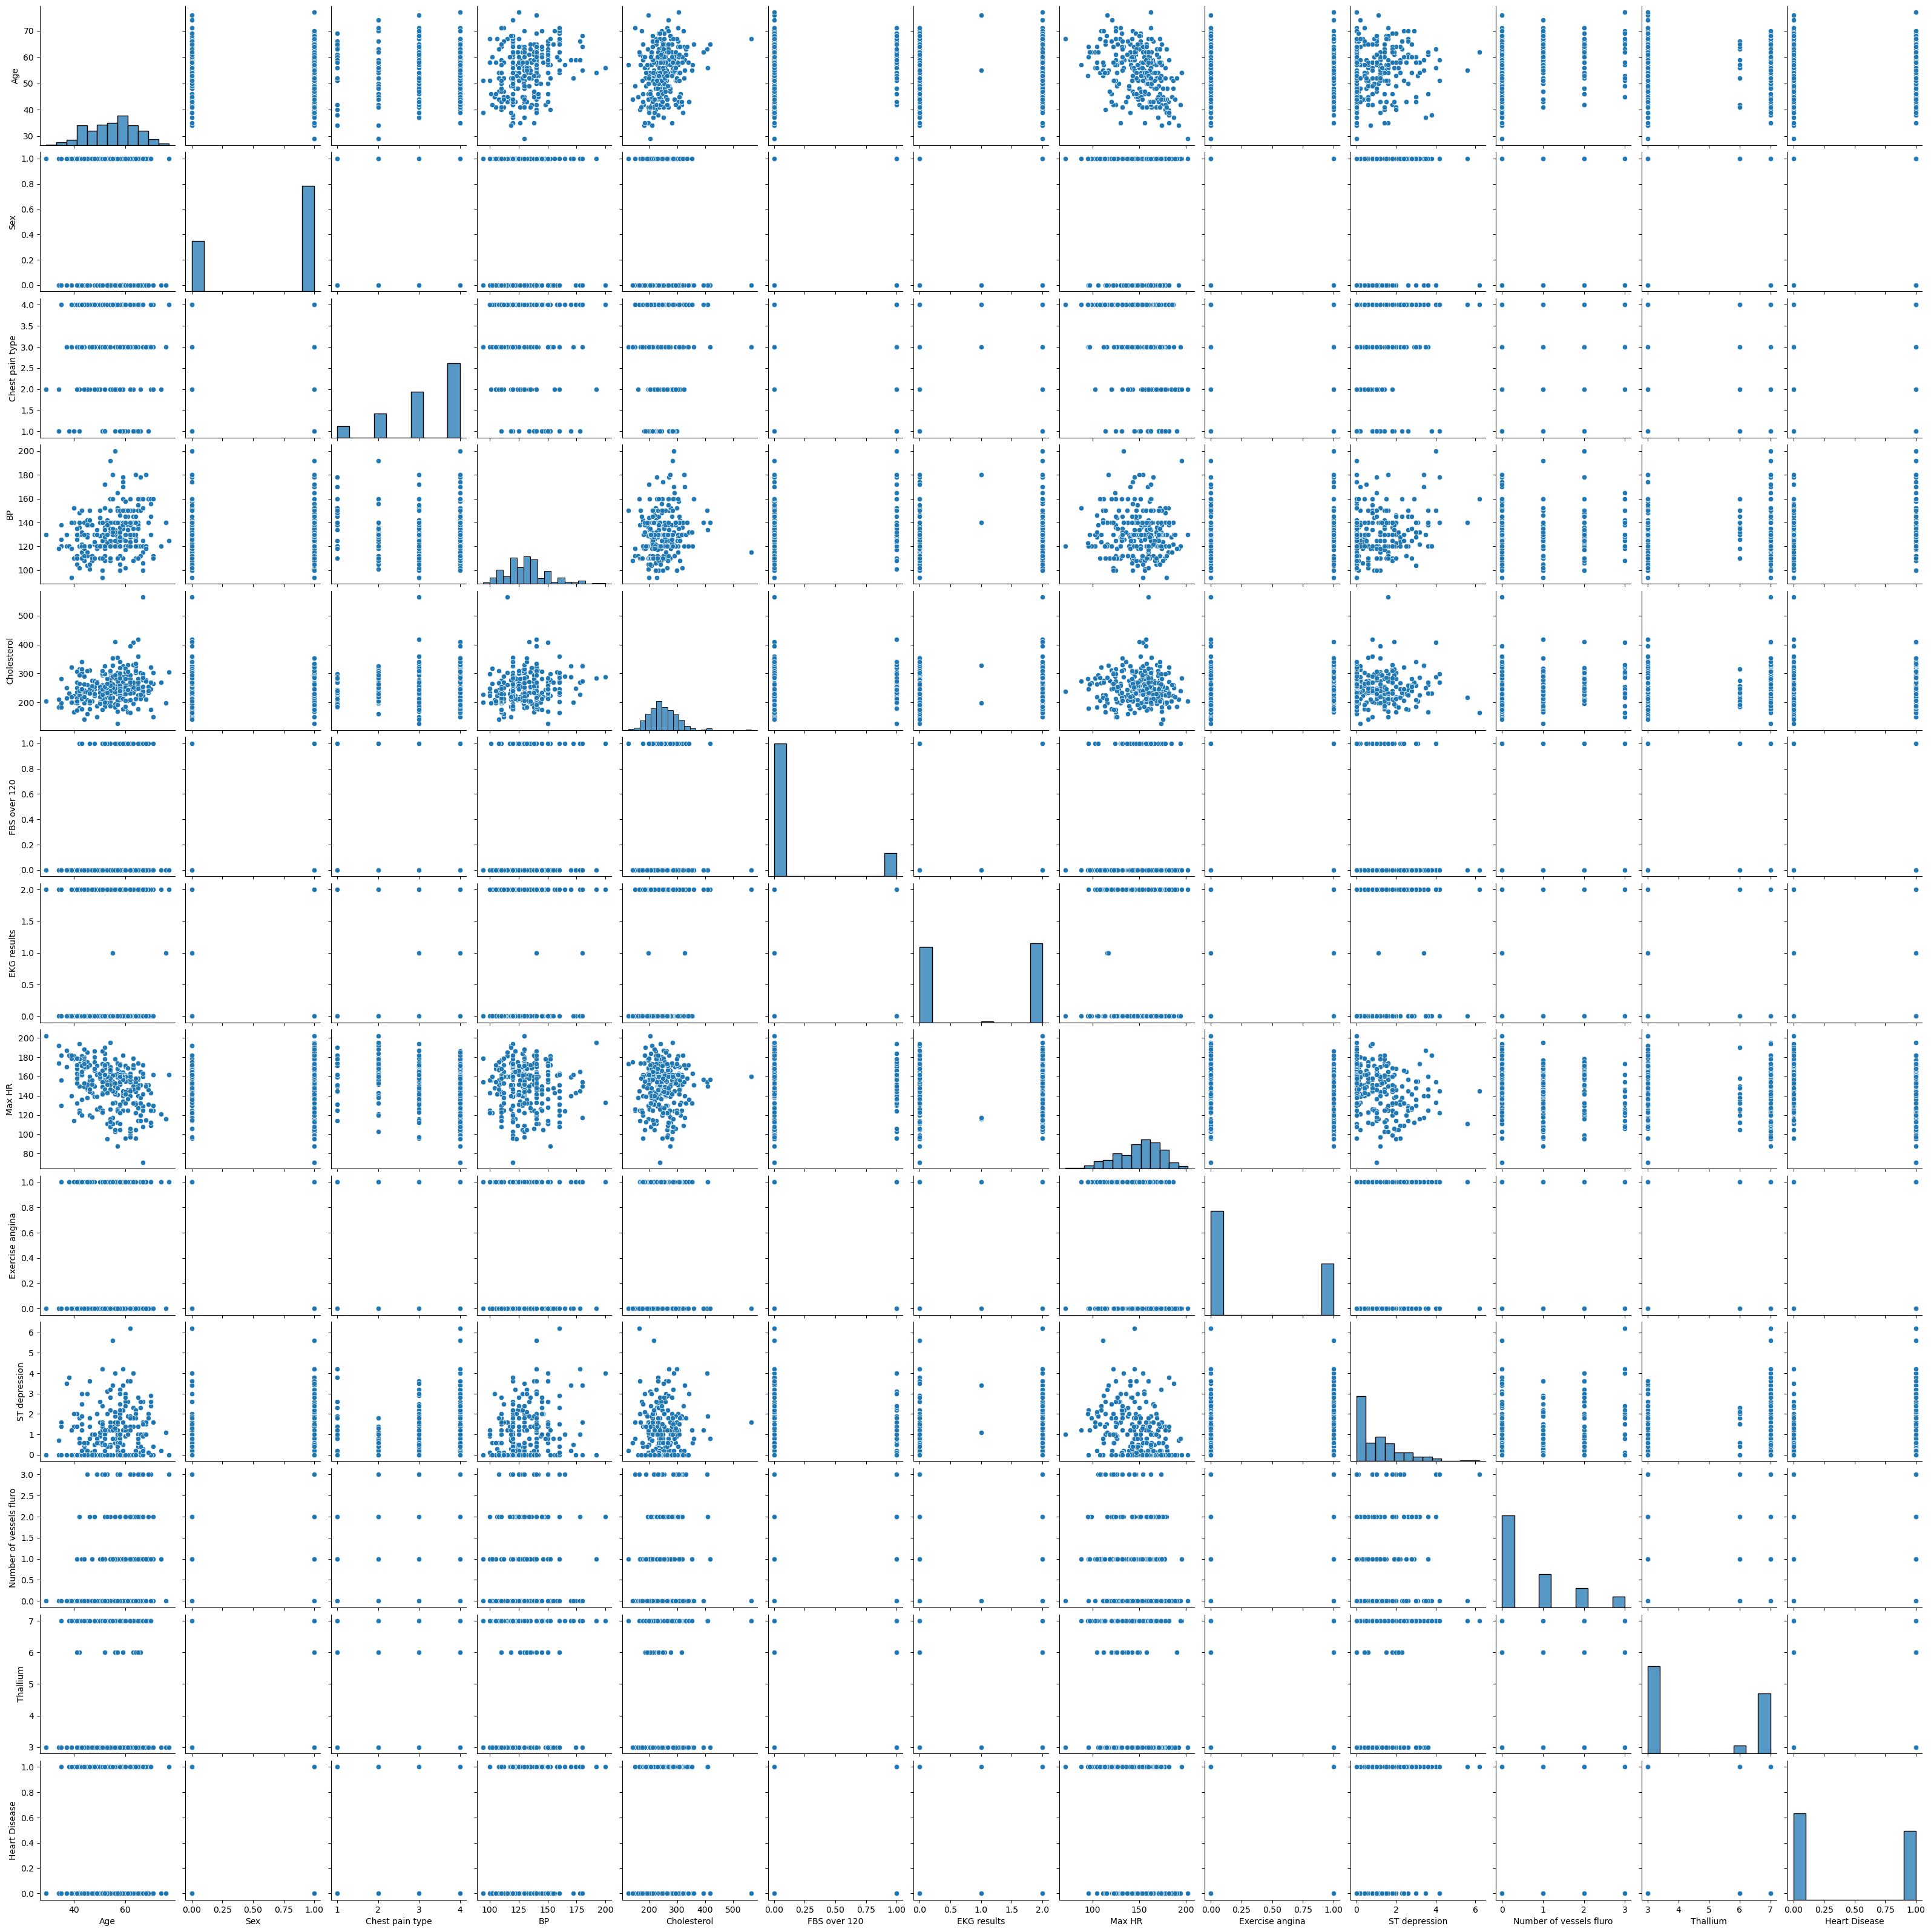

In [10]:
sns.pairplot(df)

In [11]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,3,0


<AxesSubplot:xlabel='Age', ylabel='Cholesterol'>

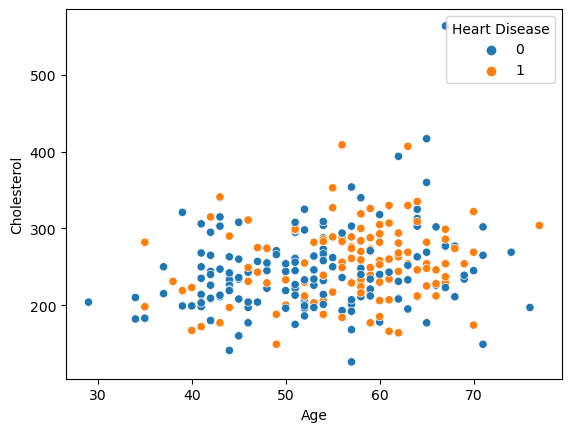

In [12]:
sns.scatterplot(df['Age'],df['Cholesterol'],hue=df['Heart Disease'])

<AxesSubplot:xlabel='Age', ylabel='ST depression'>

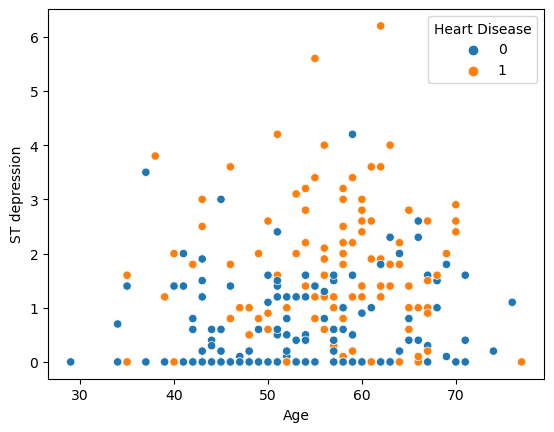

In [13]:
sns.scatterplot(df['Age'],df['ST depression'],hue=df['Heart Disease'])

In [14]:
df.groupby(by=['Heart Disease']).agg('sum')

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,Thallium
Heart Disease,,,,,,,,,,,,
0,7906,83,423,19330,36632,23,129,23750,23,93.4,43,568
1,6791,100,434,16133,30776,17,147,16663,66,190.1,138,700


In [15]:
# Splitting the dataset into training and testing sets.

x = df.iloc[:, :-2]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.25)

In [16]:
# Using standard scaler as a standardization technique.
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [17]:
# Creating KNN Model.
classifier = KNeighborsClassifier(n_neighbors = 1, p = 2, metric = 'euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [18]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1])

In [19]:
print(accuracy_score(y_test,y_pred))

0.8088235294117647


In [20]:
# SVM
from sklearn.svm import SVC
svc = SVC()

In [21]:
svc.fit(x_train,y_train)

SVC()

In [22]:
y_pred2 = svc.predict(x_test)

In [23]:
print(accuracy_score(y_test,y_pred2))

0.7647058823529411


In [24]:
# logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lR = LogisticRegression()
lR.fit(x_train,y_train)
y_pred3 = lR.predict(x_test)

In [27]:
print(accuracy_score(y_test,y_pred3))

0.8088235294117647


In [29]:
# Random forest classifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Load the dataset
df = pd.read_csv('Heart_Disease_Prediction.csv')

# Drop the "Slope of ST" column
df.drop('Slope of ST', axis=1, inplace=True)

# Encode the "Heart Disease" column
df['Heart Disease'] = df['Heart Disease'].replace({'Absent': 0, 'Present': 1})

# Split the dataset into training and testing sets
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Standardize the training and testing sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perform feature selection using random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)
selector = SelectFromModel(rfc, prefit=True)
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

# Define the hyperparameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Perform grid search to find the best hyperparameters
rfc_gs = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(rfc_gs, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
y_pred = grid_search.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))

# Print the confusion matrix and classification report
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification report: \n", classification_report(y_test, y_pred))


Best hyperparameters:  {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy score:  0.7794117647058824
Confusion matrix: 
 [[31  9]
 [ 6 22]]
Classification report: 
               precision    recall  f1-score   support

     Absence       0.84      0.78      0.81        40
    Presence       0.71      0.79      0.75        28

    accuracy                           0.78        68
   macro avg       0.77      0.78      0.78        68
weighted avg       0.79      0.78      0.78        68

